# Boston Housing Predictions
### Simple Linear Regression (SLR) vs Multivariate Linear Regression (MLR) vs Multivariate Polynomial Regression (MPR)
- Source: https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset
- Modified / Edited by: Edy Blau
- Date: 11/12/2024

__The Boston Housing Dataset__

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA (1970s). The following describes the dataset columns:

- __CRIM__ - per capita crime rate by town
- __ZN__ - proportion of residential land zoned for lots over 25,000 sq.ft.
- __INDUS__ - proportion of non-retail business acres per town.
- __CHAS__ - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- __NOX__ - nitric oxides concentration (parts per 10 million)
- __RM__ - average number of rooms per dwelling
- __AGE__ - proportion of owner-occupied units built prior to 1940
- __DIS__ - weighted distances to five Boston employment centres
- __RAD__ - index of accessibility to radial highways
- __TAX__ - full-value property-tax rate per \$10,000
- __PTRATIO__ - pupil-teacher ratio by town
- __B__ - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- __LSTAT__ - % lower status of the population
- __MEDV__ - Median value of owner-occupied homes in \$1000's

#### Upload the .csv file and add the headers.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the DataFrame
df = pd.read_csv('datasets/Boston_housing.csv', delim_whitespace=True)

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Assign the names to the columns
df.columns = column_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


#### Basic Info and description of DataFrame

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [5]:
df.shape

(505, 14)

In [6]:
# Defining the features (X) and the target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Simple Linear Regression (SLR)

In [7]:
# Simple Linear Regression (using the most correlated variable)
correlations = df.corr()['MEDV'].drop('MEDV')
correlations

CRIM      -0.388249
ZN         0.360393
INDUS     -0.484126
CHAS       0.175364
NOX       -0.427295
RM         0.695365
AGE       -0.376932
DIS        0.249896
RAD       -0.381690
TAX       -0.468543
PTRATIO   -0.508411
B          0.333394
LSTAT     -0.738187
Name: MEDV, dtype: float64

In [8]:
# Most correlated variable
most_correlated_feature = correlations.abs().idxmax()
most_correlated_feature

'LSTAT'

In [9]:
# Train/Test (using the most correlated variable)
X_simple_train = X_train[[most_correlated_feature]]
X_simple_test = X_test[[most_correlated_feature]]

In [10]:
simple_model = LinearRegression()
simple_model.fit(X_simple_train, y_train)
simple_predictions = simple_model.predict(X_simple_test)

mse_slr = mean_squared_error(y_test, simple_predictions)
r2_slr = r2_score(y_test, simple_predictions)

print("Simple Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_slr:.5f}")
print(f"R^2: {r2_slr:.5f}")

Simple Linear Regression:
Mean Squared Error (MSE): 27.87627
R^2: 0.49973


In [11]:
# Slope and intercept
slope = simple_model.coef_[0]
intercept = simple_model.intercept_
slope, intercept

(-0.9924643923428138, 35.34730929767673)

In [12]:
# In order to plot these values, they need to be converted to Numpy arrays.
y_line = np.array(slope * X_simple_train + intercept)
X_simple_train = np.array(X_simple_train)

In [13]:
y_line.shape, X_simple_train.shape

((404, 1), (404, 1))

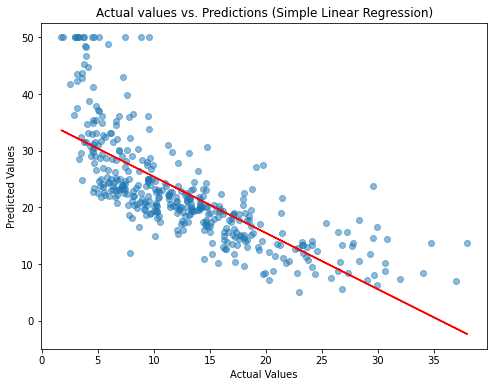

In [14]:
# Scatter plot: Actual values vs. Predictions (Simple Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(X_simple_train, y_train, alpha=0.5)
plt.plot(X_simple_train, y_line, color='red')  # Reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual values vs. Predictions (Simple Linear Regression)")
plt.show()

### Multivariate Linear Regression (MLR)

In [15]:
# We will use only the most important variables (using 'median' as metric from SelectFromModel)
# This will  will select the features whose importance (absolute coefficients for linear regression) is greater than or equal to the median of the computed importances.
multivariate_model = LinearRegression()
multivariate_model.fit(X_train, y_train)
selector = SelectFromModel(multivariate_model, threshold='median', prefit=True)
support = selector.get_support()

# Identifying the most important features
important_cols = X_train.columns[support]
print('Most important features:', important_cols)

Most important features: Index(['CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')


In [16]:
X_train_important = X_train[important_cols]
X_test_important = X_test[important_cols]

In [17]:
# Refined model
refined_multivariate_model = LinearRegression()
refined_multivariate_model.fit(X_train_important, y_train)

LinearRegression()

In [18]:
multivariate_preds = refined_multivariate_model.predict(X_test_important)

mse_mlr = mean_squared_error(y_test, multivariate_preds)
r2_mlr = r2_score(y_test, multivariate_preds)

print("\nMultivariate Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_mlr:.5f}")
print(f"R^2: {r2_mlr:.5f}")


Multivariate Linear Regression:
Mean Squared Error (MSE): 19.85794
R^2: 0.64363


#### Multivariate Polynomical Regression (MPR)

In [19]:
# Multivariate Polynomial Regression
poly = PolynomialFeatures(degree=2) # Setting the degree
X_poly_train = poly.fit_transform(X_train) # We are using all the features in X_train
X_poly_test = poly.transform(X_test)

polynomial_model = LinearRegression()
polynomial_model.fit(X_poly_train, y_train)
polynomial_predictions = polynomial_model.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, polynomial_predictions)
r2_poly = r2_score(y_test, polynomial_predictions)

print("\nMultivariate Polynomial Regression:")
print(f"Mean Squared Error (MSE): {mse_poly:.5f}")
print(f"R^2: {r2_poly:.5f}")


Multivariate Polynomial Regression:
Mean Squared Error (MSE): 9.23557
R^2: 0.83426


#### Comparing the models: SLR vs MLR vs MPR

In [20]:
results = {
    'Model': ['Simple Linear Regression', 'Multivariate Linear Regression', 'Multivariate Polynomial Regression'],
    'MSE': [mse_slr, mse_mlr, mse_poly],
    'R^2': [r2_slr, r2_mlr, r2_poly]
}

df_results = pd.DataFrame(results)
df_results

,Model,MSE,R^2
0,Simple Linear Regression,27.876273,0.499727
1,Multivariate Linear Regression,19.857940,0.643626
2,Multivariate Polynomial Regression,9.235566,0.834257


According to the above results. The best model is the `Multivariate Polynomial Regression`, which has:
- __MSE:__ 9.2355
- __R2:__ 0.83